## California Housing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor


**Get the data. Make a copy.**

In [2]:
housing_data = pd.read_csv("housing.csv")
data = housing_data.copy()

**Split the data into test and training sets.**<br/> We also considered splitting the data into training and test sets after the "preprocessing" stage, since our "preprocessing" stage involves dropping observations based on certain conditions. We came to the conclusion that postponing splitting the data would be more efficient. <br/>This is still in consideration.....

In [3]:
#data_train, data_test = train_test_split(data, test_size=0.20, random_state=11)
data_train = data
# Remember to change this, or else change the variables up to the split as 'data' and not 'data_train'
data_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## Getting a grasp on our data

In [4]:
data_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


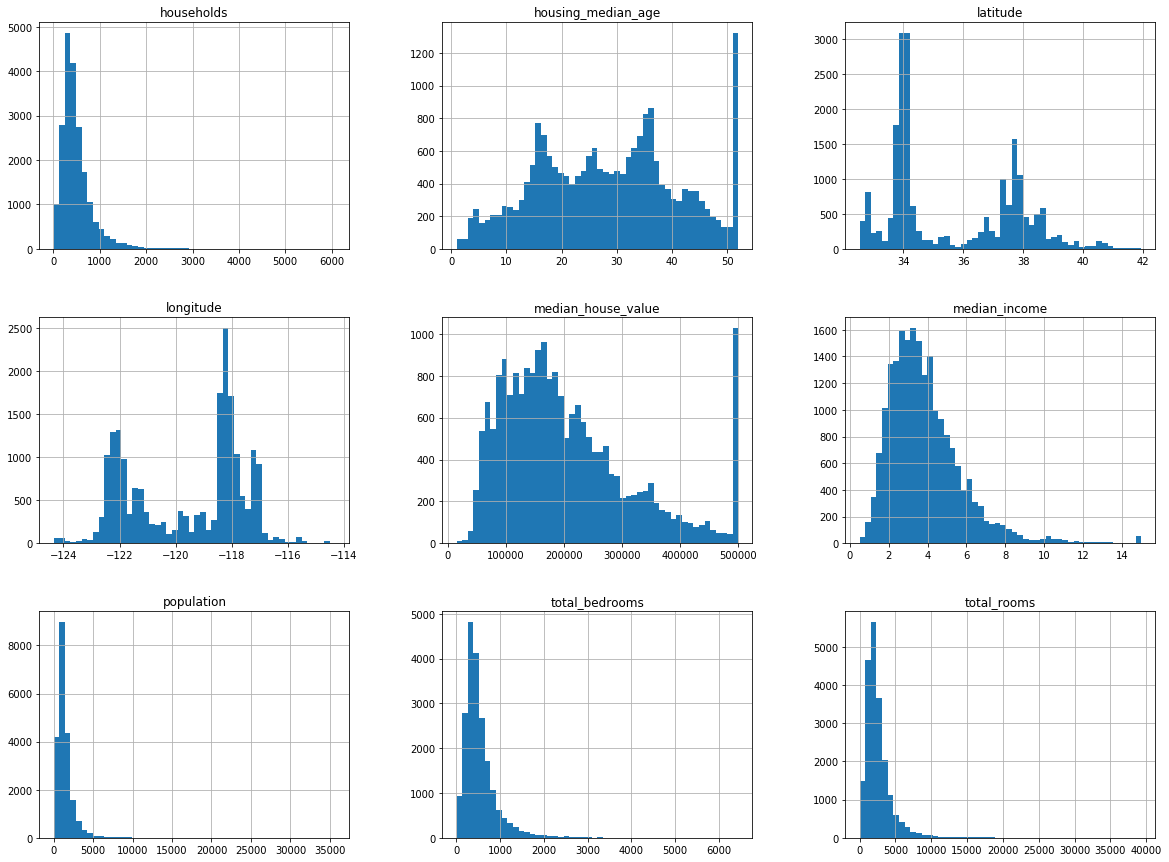

In [5]:
data_train.hist(bins=50,figsize=(20,15))
plt.show()

<br/>**Visualizing high-density areas**<br/>

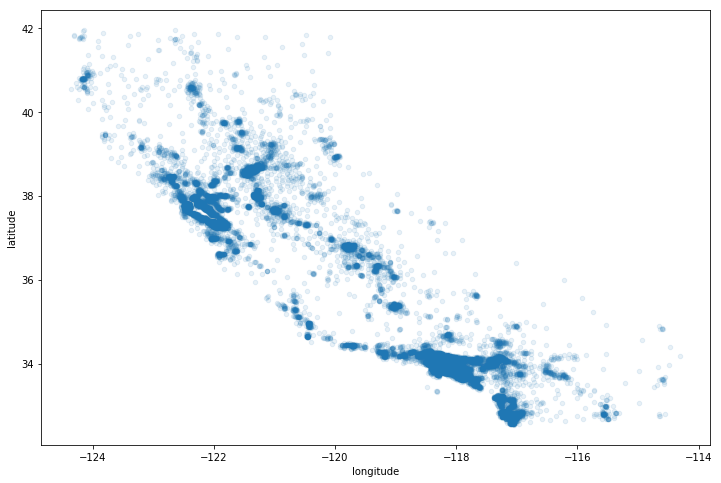

In [6]:
data_train.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,figsize=(12,8));

**Looking for correlations**

In [7]:
corr_matrix = data_train.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [8]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## Cleaning and preprocessing##
<br/> Deal with NaN or missing values. <br/> Deal with categorical data.

Do we have any missing values?

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


While my first attempt was to drop the 207 empty values for total_bedrooms, now I decided to replace them with the mean total_bedrooms.

In [10]:
data_train['total_bedrooms'] = data_train['total_bedrooms'].fillna((data_train['total_bedrooms'].sum())/len(data_train['total_bedrooms']))
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We also have capped values for the median_house_value which can improperly influence our experiment/model/results. Since we cannot reconstruct these missing labels, we opted to drop them from the training data. This is also the case for capped values of housing_median_age.

In [11]:
data_train['median_income'].max()

15.0001

Set all median_income values which are over 15 to 0

In [12]:
data_train.loc[data_train['median_income'] > 15, 'median_income'] = 0
data_train['median_income'].max()

15.0

Create a new feature to classify median_house_age values: is it 'old' or not?
<br/>Still need a more elegant way to write this, but for the time being, it works.

In [ ]:
data_train['Old'] = ''

In [ ]:
data_train.loc[data_train['housing_median_age'] <= 35 , 'Old'] = 0

In [ ]:
data_train.loc[data_train['housing_median_age'] > 35, 'Old'] = 1

In [ ]:
data_train['housing_median_age'].max()

Set all housing_median_age values which are over 51 to 0

In [ ]:
data_train.loc[data_train['housing_median_age'] > 51, 'housing_median_age'] = 0
data_train['housing_median_age'].max()

** One hot encoding for the ocean_proximity feature**<br/>

In [13]:
data_train['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
housing_cat = data_train['ocean_proximity']
housing_cat_encoded,housing_categories = housing_cat.factorize()

In [15]:
housing_categories

Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')

In [16]:
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

In [17]:
housing_cat_1hot = housing_cat_1hot.toarray()

In [18]:
data_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Feature Scaling ##

<br/> I opted for standardization as opposed to normalization. <br/> Why? It seemed like a good idea at the time.<br/> Now I'll try MinMax

In [19]:
data_labels = pd.DataFrame(data_train['median_house_value'])
data_no_labels = data_train.drop(['median_house_value'],axis=1)
data_no_labels.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [20]:
data_labels.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


In [21]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_no_labels.iloc[:,:-2])
data_scaled

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.01986344, 0.00894083,
        0.02055583],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.17147734, 0.0672104 ,
        0.18697583],
       [0.21015936, 0.5642933 , 1.        , ..., 0.02932961, 0.01381765,
        0.02894261],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.07510863, 0.0281398 ,
        0.07104095],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.06331471, 0.02068444,
        0.05722743],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.09543762, 0.03879032,
        0.08699227]])

In [22]:
df_scaled = pd.DataFrame(data_scaled)
df_scaled.head()

,0,1,2,3,4,5,6
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427


In [23]:
df_labels = pd.DataFrame(data_labels)
df_labels = df_labels.reset_index(drop=True)
df_labels.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


## Putting the pieces together##
<br/> Create a dataframe with the scaled values. <br/> Add the encoded 5 rows to said dataframe. <br/> Check it out roughly to see if it makes sense.

In [24]:


#data_scaled.columns = (data.iloc[:,:-5]).columns.....why is this giving me an error?!?!

In [25]:
ocean_proximity_cat_1hot = pd.DataFrame(housing_cat_1hot)

In [26]:
ocean_proximity_cat_1hot = ocean_proximity_cat_1hot.rename(columns=
                            {0: 'NEAR BAY', 1: '<1H OCEAN', 2:'INLAND', 3:'NEAR OCEAN', 4:'ISLAND'})

In [27]:
df_scaled = pd.concat([df_scaled, ocean_proximity_cat_1hot], axis=1, sort=False)
df_scaled = pd.concat([df_scaled,data_train['Old']],axis=1,sort=False)

KeyError: 'Old'

In [28]:
# Add back in the labels.....

df_scaled = pd.concat([df_scaled,df_labels],axis=1,sort=False)
df_scaled.head()

,0,1,2,3,4,5,6,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,median_house_value
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,1.0,0.0,0.0,0.0,0.0,452600.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,1.0,0.0,0.0,0.0,0.0,358500.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,1.0,0.0,0.0,0.0,0.0,352100.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,1.0,0.0,0.0,0.0,0.0,341300.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,1.0,0.0,0.0,0.0,0.0,342200.0


In [29]:
df_scaled.rename(columns={0: 'longitude', 1:'latitude',2:'housing_median_age',3:'total_rooms',
                          4:'total_bedrooms',5:'population',6:'households',7:'median_income'}, inplace=True)



In [30]:
df_scaled = df_scaled.drop(df_scaled[(df_scaled['median_house_value'] > 500000) == True].index)

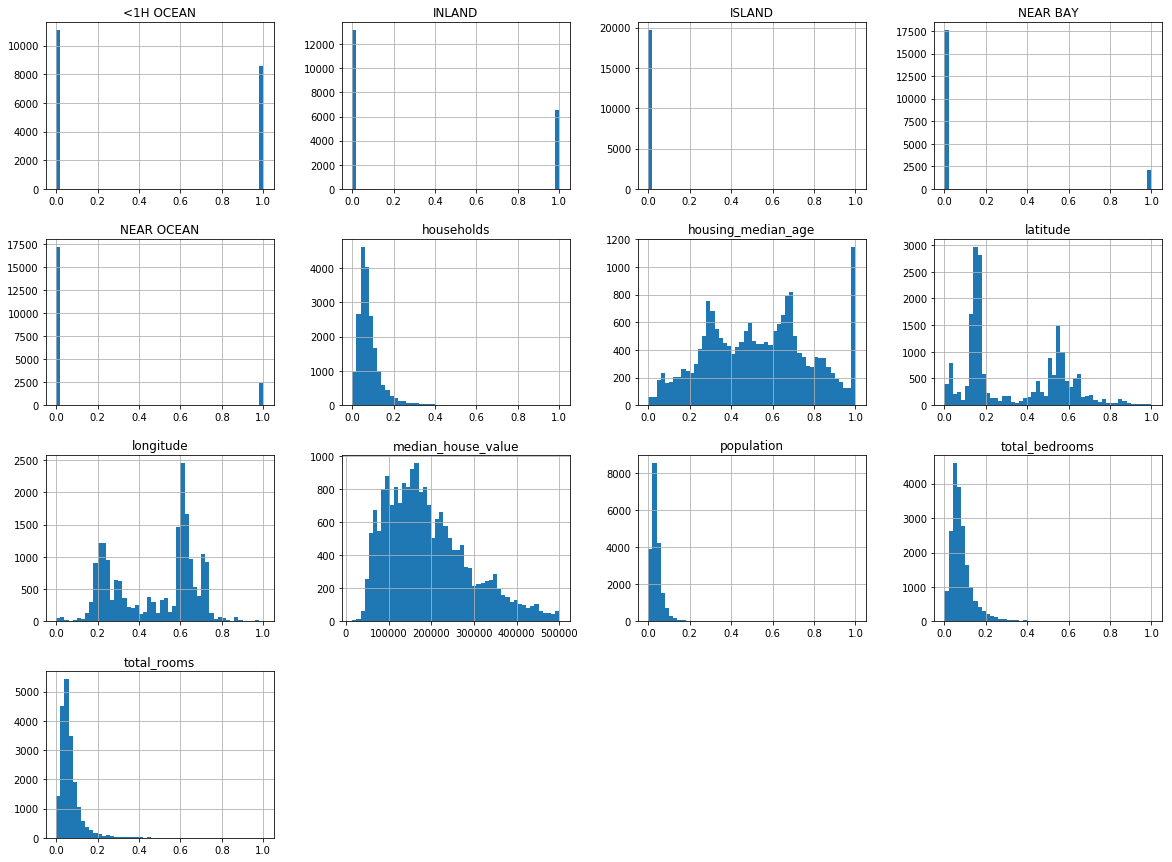

In [31]:
df_scaled.hist(bins=50,figsize=(20,15));

In [32]:
df_scaled['ISLAND'].value_counts()

0.0    19670
1.0        5
Name: ISLAND, dtype: int64

**Where did the other 3 islands go?**<br/>(And can we got there, too?)<br/>They were dropped because the housing_median_age was greater than 51. 

## FINALLY.... split it. This will be moved.

In [33]:
df_scaled.shape

(19675, 13)

In [34]:
data_training, data_testing = train_test_split(df_scaled, test_size=0.20, random_state=11)

In [35]:
data_training.shape

(15740, 13)

In [36]:
data_testing.shape

(3935, 13)

In [37]:
data_training.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,median_house_value
10267,0.647410,0.143464,0.450980,0.084541,0.077902,0.045209,0.081072,0.0,1.0,0.0,0.0,0.0,240600.0
16550,0.310757,0.561105,0.137255,0.032733,0.036313,0.024216,0.039138,0.0,0.0,1.0,0.0,0.0,138500.0
13947,0.712151,0.180659,0.411765,0.206114,0.258225,0.029681,0.069396,0.0,0.0,1.0,0.0,0.0,137200.0
5766,0.602590,0.173220,0.568627,0.001170,0.002017,0.001990,0.002467,0.0,1.0,0.0,0.0,0.0,162500.0
18024,0.241036,0.500531,0.686275,0.027646,0.028088,0.014911,0.027791,0.0,1.0,0.0,0.0,0.0,252600.0


In [38]:
# Establish the labels/output
data_training_labels = data_training['median_house_value']

# Drop the output from our training data set for the model
data_training_no_labels = data_training.drop(['median_house_value'],axis=1)

# Establish the labels/output
data_testing_labels = data_testing['median_house_value']

# Drop the output from our training data set for the model
data_testing_no_labels = data_testing.drop(['median_house_value'],axis=1)


## Transform test data##
(exactly like training data)

## Linear Regression - Multivariate## 
**<br/>Now that the data is split up, we can start to create a model.**

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(data_training_no_labels,data_training_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Try out the model with a bit of training data, quick & dirty, just to get a feel for it**

In [40]:
trial_data_no_labels = data_training_no_labels.iloc[:10]
trial_labels = data_training_labels.iloc[:10]


In [41]:
print ("Trial predictions: ",lin_reg.predict(trial_data_no_labels))

Trial predictions:  [238865.11908113 129490.65741402 200825.09716263 215693.98329379
 252320.88418281 118300.27961755 240801.78993727 122344.59733411
 126696.64060834 146904.74150817]


In [42]:
print ("Trial labels: ", trial_labels)

Trial labels:  10267    240600.0
16550    138500.0
13947    137200.0
5766     162500.0
18024    252600.0
9536      80700.0
4682     175000.0
2525      71900.0
11914    115300.0
16445    131800.0
Name: median_house_value, dtype: float64


** Measure the regression model for the quick & dirty trial **

In [43]:
def error_tests (data_labels, predictions):
    print ('Mean Squared Error:'+ str(mean_squared_error(data_labels,predictions)))
    print('Root Mean Squared Error: ' + str(np.sqrt(mean_squared_error(data_labels,predictions))))
    print('R Squared: ' + str(r2_score(data_labels,predictions)))

In [44]:
trial_predictions = lin_reg.predict(trial_data_no_labels)
error_tests(trial_labels,trial_predictions)

Mean Squared Error:1560835943.8539464
Root Mean Squared Error: 39507.41631458512
R Squared: 0.5159623632022934


Whoa! That's crazy...crazy bad! Let's see if it's just as bad with the test data. 

**Using the test data**

In [ ]:
lin_predictions = lin_reg.predict(data_testing_no_labels)
error_tests(data_testing_labels,lin_predictions)

Based on this test, our model would be off by $60,251 on average. Geez... that's not good.

In [ ]:
lin_predictions

## Linear Regression with two variables##
** After the motto, "Location, location, location," let's try just using the latitude and longitude as predictors.**

In [ ]:
# Drop the output from our training data set for the model
location_training_no_labels = data_training[['latitude', 'longitude']]

In [ ]:
lin_reg_location = LinearRegression()
lin_reg_location.fit(location_training_no_labels,data_training_labels)

In [ ]:
location_testing_no_labels = data_testing[['latitude','longitude']]
location_predictions = lin_reg_location.predict(location_testing_no_labels)

In [ ]:
error_tests(data_testing_labels,location_predictions)

That's even worse. Let's try another model. And then look at feature engineering.

## K Neighbors Regression

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=6)
neigh.fit(data_training_no_labels,data_training_labels)
knr_predictions = neigh.predict(data_testing_no_labels)


In [ ]:
error_tests(data_testing_labels,knr_predictions)

In [ ]:
type(data_training_labels)

In [ ]:
data_testing_no_labels.head()


In [ ]:
%matplotlib notebook

data_testing.plot(kind='scatter',x='longitude',y='latitude',c=knr_predictions,alpha=0.99,figsize=(6,4),s=2,cmap='cool');


In [ ]:
%matplotlib notebook

data_testing.plot(kind='scatter',x='longitude',y='latitude',c='median_house_value',alpha=0.99,figsize=(6,4),s=2,cmap='cool');


## Evaluate both models using cross-validation

In [ ]:
scores = cross_val_score(neigh,data_training_no_labels,data_training_labels,scoring='neg_mean_squared_error',cv=10)
knr_rmse_scores = np.sqrt(-scores)

In [ ]:
def show_scores (scores):
    print ("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
show_scores(knr_rmse_scores)

In [ ]:
lin_scores = cross_val_score(lin_reg,data_training_no_labels,data_training_labels,scoring='neg_mean_squared_error',cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)


In [ ]:
show_scores(lin_rmse_scores)

Since the Multivariate Linear Regression has the lower standard deviation, let's stick with this model and try to fine-tune the model. <br/> Now, after using a different scaler and working on the features, KNR proves to be the better model.

## Linear Regression with two variables
 latitude and median income

In [ ]:
# Drop the output from our training data set for the model
loccash_training_no_labels = data_training[['latitude', 'median_income']]

In [ ]:
lin_regr = LinearRegression()
lin_regr.fit(loccash_training_no_labels,data_training_labels)

In [ ]:
loccash_testing_no_labels = data_testing[['latitude','median_income']]
loccash_predictions = lin_regr.predict(loccash_testing_no_labels)

In [ ]:
error_tests(data_testing_labels,loccash_predictions)

## KNR with the same two variables

In [ ]:
neighb = KNeighborsRegressor(n_neighbors=9)
neighb.fit(loccash_training_no_labels,data_training_labels)
knr_predict = neighb.predict(loccash_testing_no_labels)


In [ ]:
error_tests(data_testing_labels,knr_predict)

(Initial attempt) Maybe that wasn't the best idea.
<br/> (Second attempt) It actually seems to perform better than the linear regression model.

## KNR with latitude, longitude, income

In [ ]:
latloncash_testing_no_labels = data_testing[['latitude','longitude','median_income']]
latloncash_training_no_labels = data_training[['latitude', 'longitude','median_income']]


In [ ]:
neighbo = KNeighborsRegressor(n_neighbors=9)
neighbo.fit(latloncash_training_no_labels,data_training_labels)
knr_predict2 = neighbo.predict(latloncash_testing_no_labels)

In [ ]:
error_tests(data_testing_labels, knr_predict2)

Hmm... this is the best yet. I might be on to something here.
<br/> But the test data was scaled, too, (note to self: don't always listen to the group) and I need to change the other code and create a transformation pipeline to properly evaluate my model.

## Feature Engineering

In [ ]:
lin_reg.get_params

In [ ]:
lin_reg.coef_

In [ ]:
neigh.get_params

In [ ]:
neigh.kneighbors